__Objectives__

- What is polynomial regression? Why do we need them?

- Use sklearn to generate polynomial features.

- What is training error and test error?

- What is Bias and Variance in ML? 

- What is underfitting and overfitting?

# Polynomial Regression

Recall that before we discussed the linear models. Today we will see that the linearity assumption is very insufficient to explain complex relations. In order to be able to address this problem we will see how to add higher orders of a variable to detect non-linear relations between X and y. 

- In polynomial regression our model will look like:

$$\hat y_i = \hat\beta_0+\hat\beta_1x_i +\hat\beta_2 x^2_i+\hat\beta_3 x^3_i+...+\hat\beta_d x^d_i+\epsilon_i$$ 

- For the loss function we will be still using RSS.

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

import pickle

In [2]:
## Uniformly sample from -2pi and 2pi. We will be working with 150 observations.

x = np.random.uniform(-2*pi, 2*pi, 150)

## We created the target variables y: So we know the true relation between x and y 
## Note also that we added some noise to the y variable.

y = np.sin(x) + np.random.normal(loc = 0, scale = 0.4, size = len(x))

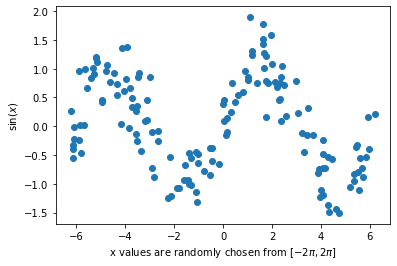

In [3]:
## Let's plot the data
plt.scatter(x,y)

plt.ylabel('$\sin(x)$')

plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')

plt.show()

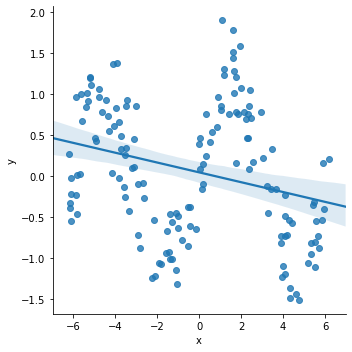

In [4]:
# use seaborn lmplot to visualize regression line 
import pandas as pd

data = pd.DataFrame(data = {'x': x, 'y':y})

import seaborn as sns

sns.lmplot(x = 'x', y= 'y', data = data)

plt.show()

As it is clear from the plot the linear model is insufficient to capture the pattern in the data. This is called __underfitting__. One solution to this problem is to increase the number of variables by adding higher orders of the already existing variables. 

__Your Turn__

- We will use PolynomialFeature class to be able to create new features.

- Create a new dataset with all the powers of x up to 7 degree.

In [5]:
## Now let's use PolynomialFeature to create higher order features
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures(degree = 7)
x = x.reshape((-1,1))
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.00000000e+00, -6.09040832e+00,  3.70930735e+01, ...,
        -8.37976907e+03,  5.10362153e+04, -3.10831390e+05],
       [ 1.00000000e+00,  3.68670639e+00,  1.35918040e+01, ...,
         6.81071584e+02,  2.51091096e+03,  9.25699150e+03],
       [ 1.00000000e+00,  3.06229174e+00,  9.37763070e+00, ...,
         2.69297806e+02,  8.24668446e+02,  2.52537537e+03],
       ...,
       [ 1.00000000e+00, -5.69667517e+00,  3.24521080e+01, ...,
        -5.99939256e+03,  3.41765906e+04, -1.94692935e+05],
       [ 1.00000000e+00,  2.40939815e+00,  5.80519945e+00, ...,
         8.11975385e+01,  1.95637199e+02,  4.71367906e+02],
       [ 1.00000000e+00,  5.83684940e+00,  3.40688109e+01, ...,
         6.77473698e+03,  3.95431195e+04,  2.30807233e+05]])

In [7]:
# %load -r 1-5 supplement.py


In [8]:
## Fit a linear model by either using sklearn.linearmodel or statsmodel.api 

from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

lr.fit(x_poly, y)

y_pred = lr.predict(x_poly)

y_pred

array([-0.10539253, -0.48114041,  0.2013368 , -0.9309384 , -0.90319951,
        0.31057432,  0.6665586 ,  0.38118989,  1.01467255, -0.20623552,
       -0.82290806, -1.01604386,  0.13340103,  0.22272705,  0.06893171,
       -0.90462575,  0.1293321 , -0.10828576, -0.16970834, -0.29717442,
       -0.79632575, -0.85299067,  0.09605924, -0.90893027, -0.91377072,
       -1.03972415, -0.84449996,  0.81427756,  0.50244412,  0.96160042,
       -0.8727497 ,  0.02235789, -0.90797594, -0.0921619 ,  0.7006659 ,
       -0.80402437,  0.8168151 , -0.23711271,  1.04715597,  0.36471538,
       -1.15633757, -0.25521866, -0.06225175, -0.51985487, -1.02990316,
        0.59530352, -0.510047  ,  0.72068358,  0.34249783, -0.92680905,
       -0.75424889, -0.78977633,  0.57003908, -0.76909175, -0.11419095,
        0.76564358, -0.41305284,  0.88145793,  0.47457221, -0.85283693,
        0.30301467, -0.8726194 ,  0.96020611,  0.81970593,  0.14662435,
       -0.71956402,  0.11424053, -0.73588423, -0.17858619, -0.14

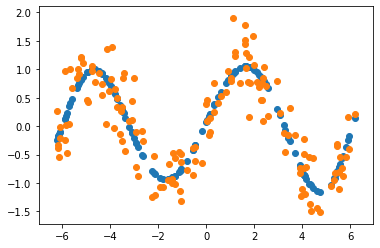

In [14]:
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree = 7)
X = x.reshape((-1,1))
x_poly = poly.fit_transform(X)
lr.fit(x_poly, y)

y_pred = lr.predict(x_poly)

y_pred
plt.scatter(X, y_pred)

plt.scatter(x, y)

In [21]:
sum((y-y_pred)**2)

25.20593648025617

__Your Turn__

- Use the dataset you created above and fit a linear model to this dataset.

- Make predictions using this data and model.

In [16]:
# %load -r 8-14 supplement.py

def line(x, y, degree):
    
    poly = PolynomialFeatures(degree = degree)
    x = x.reshape((-1,1))
    
    x_poly = poly.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_poly, y)
    y_pred = lr.predict(x_poly)
    rss = sum((y_pred- y)**2)
    return rss

line(x,y,19)

18.925183350326147

In [17]:
error_list = []
for i in np.arange(1, 52,2):
    rss = line(x,y,degree = i)
    error_list.append(rss)


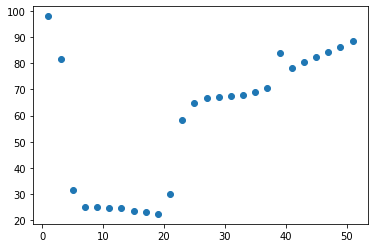

In [24]:
plt.scatter(x = np.arange(1, 52,2), y = np.array(error_list))

In [25]:
line(x,y, degree = 18)

22.978375604516724

In [26]:
line(x,y, degree = 19)

22.433917250789943

In [27]:
line(x,y, degree = 20)

23.339625235720263

__Your Turn__

- Now plot both predictions and true values and analyze the results.

In [1]:
load -r 40-46 supplement.py

__Q:__ It looks like polynomial variables works very well, then why don't we add polynomial features all the time?

# Bias - Variance

In statistical learning and machine learning we start with a model:

$$ Y = f(X) + \epsilon$$

Here $f$ is the function that gives the 'true' relationship between $X$ values and $Y$ values.

- In many situation, from a given a train set $X, y$ we would like to find an estimate $\hat{f}$ of $f$. 

- Notice that the actual $f$ might be very complicated and $\hat{f}$ will be a simplified estimator of $f$ in general.

- We can evaluate the models performance with a metric. In regression setting it is mostly given as MSE:


$$ MSE = \frac{1}{n}\sum\limits_{i=1}^{n}(y_{i} - \hat{f}(x_{i}))^{2}$$

- However, we are really not interested in whether $\hat{f}(x_i) \sim y_i$; instead, we want to know whether $\hat{f}(x_0)$ is approximately equal to $y_{0}$, where $(x_0, y_0)$ is a previously unseen test observation not used to train the statistical learning method.

<img src="img/test_train.png" cap="Transformed dataset"  width='600'/>

- This U-shape we observe on the right between test error and training error is a very common and result of two competing notion: 'Bias' and 'Variance' of the model. More excplicitly we say that the 'average' test error can be decompose into three pieces.

<img src="img/bias_variance.png" cap="Transformed dataset"  width='400'/>

__A good model__

- Low error --> Low variance + low bias


__Variance__

- Refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.

__Bias__

- Refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.


__Q:__ Find a model with a very high bias and very low variance.

__Q:__ Find a model with a very high variance and very low bias.


__Your Turn__

I created a data set and stored this as a pickle. When you load the pickle we will have a list of the form [x,y]. We know that there is a polynomial relationship between x and y. Now the question is to find this relation.


In [29]:
import pickle

with open(r"data_list_xy.pickle", "rb") as input_file:
        data = pickle.load(input_file)

In [30]:
x = data[0]

y = data[1]

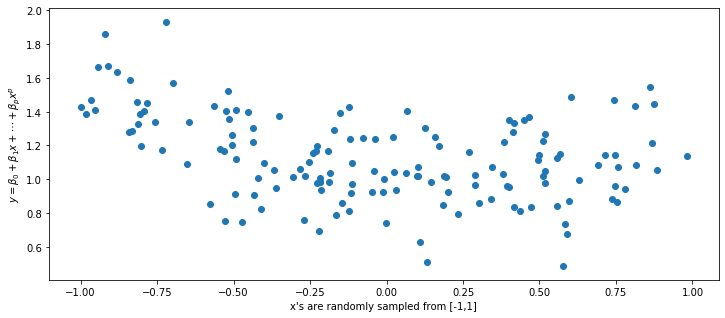

In [31]:
plt.figure(figsize = (12, 5))

plt.scatter(x,y)

plt.xlabel("x's are randomly sampled from [-1,1]" )

plt.ylabel("$y = \\beta_{0} + \\beta_{1}x + \\cdots + \\beta_{p}x^{p}$")

plt.show()

__Your Turn__

- We know that the true relation between x and y above is a polynomial one. 

- Try to find this relationship



In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [63]:
X = x.reshape((-1,1))
degree = 20
poly = PolynomialFeatures(degree = degree, )
x_poly = poly.fit_transform(X)

In [66]:
x_poly.shape

(150, 21)

In [82]:
mse = mean_squared_error(y_true = y, )

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [70]:
lr.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
better_line.coef_

array([-0.1796])

In [57]:
better_line.intercept_

1.1206488859242727

In [72]:
y_pred = lr.predict(x_poly)

In [75]:
## this is for 20 degrees

mse = mean_squared_error(y_true = y, y_pred = y_pred )
mse

0.03640994184253009

In [80]:
## now for all degrees between 0 and 100

mse_list = []

for degree in range(2, 101):
    poly = PolynomialFeatures(degree=degree)
    poly_data = poly.fit_transform(X)
    lr.fit(poly_data, y)
    y_pred = lr.predict(poly_data)
    mse = mse = mean_squared_error(y_true = y, y_pred = y_pred )
    mse_list.append(mse)

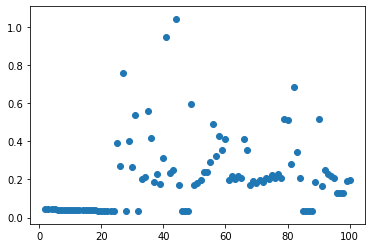

In [81]:
## plt mse scores with respect to varying degrees

plt.scatter(x = range(2, 101), y = mse_list)

In [37]:
# %load -r 25-32 supplement.py
## function returns the dataset of a given polynomial degree
def create_dataset(x, degree):
    ## Instantiate the PolynomialFeatures object with given 'degree'
    poly = PolynomialFeatures(degree=degree)

    ## Now transform data to create higher order features
    new_data = poly.fit_transform(x.reshape(-1, 1))
    return new_data

__Documentation__

[Sklearn-PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


__Fit a linear model__

In [38]:
def find_coefficients(data, y):
    np.set_printoptions(precision=4, suppress=True)

    lr = LinearRegression(fit_intercept=False)
    
    lr.fit(data, y)
    
    print(lr.coef_)
    
    y_pred = lr.predict(data)

    return y_pred

In [39]:
## create the dataset with given degree
new_x = create_dataset(x, degree= 25)

## fit a linear regression and print coefficients return predictions
predict = find_coefficients(new_x, y)

[        1.0411        -0.6895         0.9903        41.8351
       -96.7283     -1202.9423      1974.3301     17644.1072
    -21490.951    -148123.5133    157569.7595    781069.3839
   -790648.6615  -2749514.0651   2646064.6833   6673416.7363
  -5805387.4699 -11252252.5534   8194340.8018  12957208.2911
  -7144694.0592  -9706259.326    3495465.3923   4252021.5258
   -733144.992    -824096.0916]


In [43]:
## plot predictions and true values
## discuss the results.
def plot_predict(x,y,y_pred):
    plt.scatter(x,y, label = 'true')
    plt.scatter(x, y_pred, label = 'train')
    plt.legend()
    plt.show()
    return

ValueError: x and y must be the same size

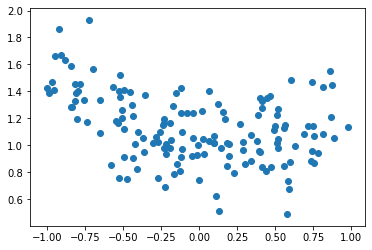

In [46]:
plot_predict(x,y, y_pred = 57)

Run the cell below to find out the true parameters

In [41]:
# %load -r 35-37 supplement.py
Note that true (population) parameters were:

$$ \beta_{0} = 1, \quad \beta_{1} = 0, \quad \beta_{2} = 0.4, \quad \beta_{3} = - 0.23 $$

The chart below is very common online so I wanted to share here. I think this gives a nice summary but please note that this is absolutely representative.

<img src="https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" width=350, height=350>  
